- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
df = pd.read_csv(path)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Null hypothesis: 

There is no difference in insurance charges between smokers vs. non-smokers.

Alternative Hypothesis:

Smokers have higher insurance charges vs. non-smokers.

In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
smokers_df = df.loc[df['smoker']=='yes'].copy()
non_smokers_df = df.loc[df['smoker']=='no'].copy()

In [18]:
smoker_charges = smokers_df['charges']
non_smoker_charges = non_smokers_df['charges']

In [15]:
# Check for outliers in weight for smoker group
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [9]:
# remove outliers from smoker group
smoker_charges = smoker_charges[(np.abs(stats.zscore(smoker_charges)) < 3)]

In [8]:
# Check for outliers in weight for non smoker group
zscores= stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [10]:
# remove outliers from non non_smoker group
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [19]:
# test the smoker charges group for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [20]:
# test the non_smoker charges group for normality
result_non_smoker_charges = stats.normaltest(non_smoker_charges)
result_non_smoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

both groups are well below 0.05 and not normally distributed but the sample is large enough to proceed

In [21]:
# Test for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

No equal variance

In [23]:
## Final t-test, after confirming we meet the assumptions
result = stats.ttest_ind(smoker_charges,non_smoker_charges)
result

Ttest_indResult(statistic=51.2078044173717, pvalue=3.68768124e-315)

In [24]:
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000000
Significant: True


a significant result (p < 0.05) means we reject the null hypothesis and accept the alternative hypothesis

In [19]:
## concatenate the two dataframes for visualziation.
plot_df = pd.concat([smokers_df, 
                     non_smokers_df], axis=0)
plot_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


<AxesSubplot: xlabel='smoker', ylabel='charges'>

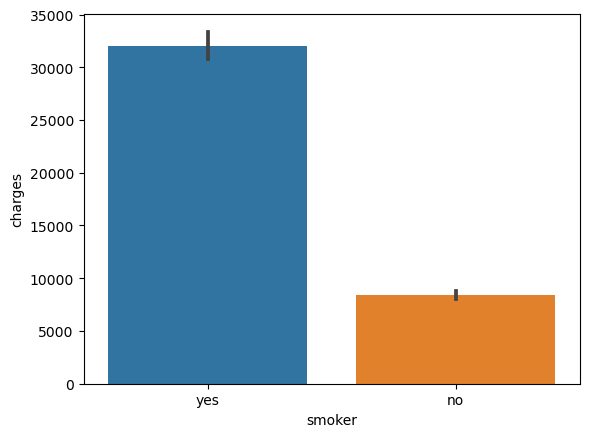

In [20]:
sns.barplot(data=plot_df, x='smoker',y='charges')